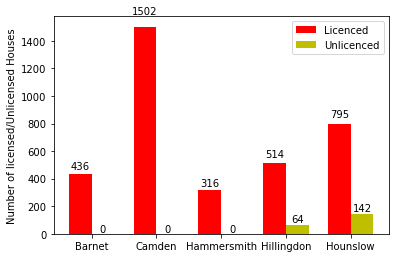

In [18]:
from pandas.io.json import json_normalize
from pymongo import MongoClient
import numpy as np
import matplotlib.pyplot as plt
import datetime
from matplotlib.gridspec import GridSpec

client = MongoClient()
db = client.test
collection = db['HMODataFOI']
cursor = list(collection.find({}, {'_id': False}))
result = json_normalize(cursor)

BarnetA=0
CamdenA=0
HammersmithA=0
HillingdonA=0
HounslowA=0
BarnetB=0
CamdenB=0
HammersmithB=0
HillingdonB=0
HounslowB=0


for index, row in result.iterrows():
    if (row['Council']) == 'Barnet':
        BarnetA=int(row['A'])
        BarnetB=int(row['B'])

    elif (row['Council']) == 'Camden':
        CamdenA=int(row['A'])
        CamdenB=int(row['B'])
    elif (row['Council']) == 'Hammersmith and Fulham':
        HammersmithA=int(row['A'])
        HammersmithB=int(row['B'])
    elif (row['Council']) == 'Hillingdon':
        HillingdonA=int(row['A'])
        HillingdonB=int(row['B'])
    elif (row['Council']) == 'Hounslow':
        HounslowA=int(row['A'])
        HounslowB=int(row['B'])

N = 5
lic_h = (BarnetA, CamdenA, HammersmithA, HillingdonA, HounslowA)
unlic_h = (BarnetB, CamdenB, HammersmithB, HillingdonB, HounslowB)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, lic_h, width, color='r') 
rects2 = ax.bar(ind + width, unlic_h, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Number of licensed/Unlicensed Houses')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Barnet', 'Camden', 'Hammersmith', 'Hillingdon', 'Hounslow'))

ax.legend((rects1[0], rects2[0]), ('Licenced','Unlicenced'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

In [19]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


